<a href="https://colab.research.google.com/github/anas1IA/TP_DEEP_Learning/blob/main/Tp_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Genration de donnees

In [1]:
import numpy as np

def generate_xor_data(num_samples):
    # Générer des paires d'entrées binaires aléatoires
    X = np.random.randint(0, 2, size=(num_samples, 2))

    # Calculer les sorties XOR correspondantes
    y = np.logical_xor(X[:, 0], X[:, 1]).astype(int)

    return X, y

# Générer 100 exemples de données XOR
num_samples = 100
X_xor, y_xor = generate_xor_data(num_samples)

# Afficher les données générées
print("Entrées XOR :\n", X_xor)
print("Sorties XOR :\n", y_xor)


Entrées XOR :
 [[1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]]
Sorties XOR :
 [0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1
 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1]


## Le Perceptron


In [2]:
import numpy as np

class Perceptron:
    def __init__(self, input_size):
        # Initialisation des poids et du seuil
        self.weights = np.random.rand(input_size)
        self.threshold = np.random.rand()

    def step_function(self, x):
        # Fonction échelon unitaire
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Calcul de la sortie du perceptron
        net_input = np.dot(self.weights, x) - self.threshold
        output = self.step_function(net_input)
        return output

# Génération des données XOR
num_samples = 100
X_xor, y_xor = generate_xor_data(num_samples)

# Initialisation du perceptron avec la taille d'entrée appropriée (2 pour XOR)
perceptron = Perceptron(input_size=2)

# Entraînement du perceptron
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    for i in range(num_samples):
        # Sélection d'un exemple aléatoire
        random_index = np.random.randint(num_samples)
        x_sample = X_xor[random_index]
        y_sample = y_xor[random_index]

        # Calcul de la prédiction du perceptron
        prediction = perceptron.predict(x_sample)

        # Mise à jour des poids en fonction de l'erreur
        error = y_sample - prediction
        perceptron.weights += learning_rate * error * x_sample
        perceptron.threshold -= learning_rate * error

# Test du perceptron sur les données XOR générées
predictions = [perceptron.predict(x) for x in X_xor]

# Affichage des résultats
print("Vraies sorties XOR :\n", y_xor)
print("Prédictions du perceptron :\n", predictions)


Vraies sorties XOR :
 [0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1]
Prédictions du perceptron :
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Transformation Polynomiale

In [3]:
import numpy as np

class PolynomialTransformPerceptron:
    def __init__(self, input_size):
        # Initialisation des poids et du seuil
        self.weights = np.random.rand(input_size)
        self.interactions_weights = np.random.rand(input_size, input_size)
        self.threshold = np.random.rand()

    def polynomial_function(self, x):
        # Fonction de décision avec termes quadratiques
        linear_term = np.dot(self.weights, x)
        quadratic_term = np.sum(np.sum(self.interactions_weights * np.outer(x, x)))
        return linear_term + quadratic_term

    def step_function(self, x):
        # Fonction échelon unitaire
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Calcul de la sortie du perceptron avec transformation polynomiale
        decision_value = self.polynomial_function(x)
        output = self.step_function(decision_value - self.threshold)
        return output

# Génération des données XOR
num_samples = 100
X_xor, y_xor = generate_xor_data(num_samples)

# Initialisation du perceptron avec la taille d'entrée appropriée (2 pour XOR)
poly_perceptron = PolynomialTransformPerceptron(input_size=2)

# Entraînement du perceptron
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    for i in range(num_samples):
        # Sélection d'un exemple aléatoire
        random_index = np.random.randint(num_samples)
        x_sample = X_xor[random_index]
        y_sample = y_xor[random_index]

        # Calcul de la prédiction du perceptron avec transformation polynomiale
        prediction = poly_perceptron.predict(x_sample)

        # Mise à jour des poids en fonction de l'erreur
        error = y_sample - prediction
        poly_perceptron.weights += learning_rate * error * x_sample
        poly_perceptron.interactions_weights += learning_rate * error * np.outer(x_sample, x_sample)
        poly_perceptron.threshold -= learning_rate * error

# Test du perceptron avec transformation polynomiale sur les données XOR générées
predictions_poly = [poly_perceptron.predict(x) for x in X_xor]

# Affichage des résultats
print("Vraies sorties XOR :\n", y_xor)
print("Prédictions du perceptron avec transformation polynomiale :\n", predictions_poly)


Vraies sorties XOR :
 [1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0]
Prédictions du perceptron avec transformation polynomiale :
 [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]


##  Visualisation, Analyse et t Interprétation

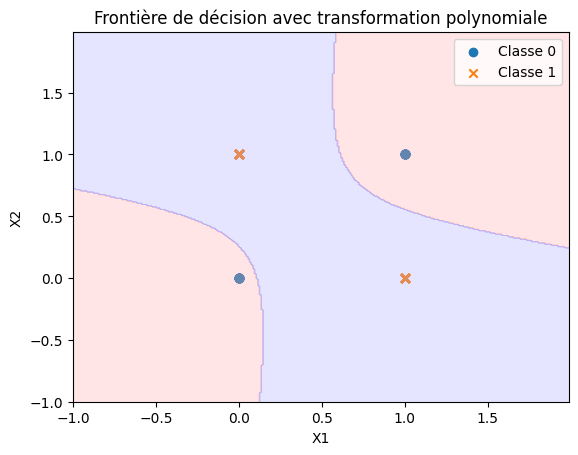

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Générer une grille d'échantillons pour la visualisation de la frontière de décision
x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prédire la classe pour chaque point de la grille
Z = np.array([poly_perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Afficher le nuage de points des données XOR
plt.scatter(X_xor[y_xor == 0][:, 0], X_xor[y_xor == 0][:, 1], label='Classe 0', marker='o')
plt.scatter(X_xor[y_xor == 1][:, 0], X_xor[y_xor == 1][:, 1], label='Classe 1', marker='x')

# Afficher la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

# Ajouter des légendes et des titres
plt.title('Frontière de décision avec transformation polynomiale')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Afficher le graphique
plt.show()
